# REGRESSION

Dataset Source: https://www.kaggle.com/swathiachath/kc-housesales-data

# Importing Data Set

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv('export_dataframe.csv')

## Viewing Data

In [2]:
data.shape

(21597, 21)

Missing values are marked as '?'

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null object
date             21597 non-null object
price            21597 non-null object
bedrooms         21597 non-null object
bathrooms        21597 non-null object
sqft_living      21597 non-null object
sqft_lot         21597 non-null object
floors           21597 non-null object
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null object
sqft_basement    21597 non-null object
yr_built         21597 non-null object
yr_renovated     21597 non-null object
zipcode          21597 non-null object
lat              21597 non-null object
long             21597 non-null object
sqft_living15    21597 non-null object
sqft_lot15       21597 non-null object
dtypes: object(21)
memory usage: 3.5+ MB


## Dataset Summary:
- Features: 21
     - Categorical columns: 2
     - Ordinal columns: 4
- Rows: 21597
- Percentage of missing values: 5.0%
- Target Value: 'Price'

# Replacing '?' (missing values) with nan

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,?,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,?,0,?,47.7379,-122.23299999999999,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,?,1965,0,?,47.5208,-122.39299999999999,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data = data.replace('?', np.nan)

In [6]:
data.isna().sum()

id               1072
date             1065
price            1069
bedrooms         1066
bathrooms        1067
sqft_living      1070
sqft_lot         1068
floors           1078
waterfront       1074
view             1073
condition        1073
grade            1071
sqft_above       1077
sqft_basement    1063
yr_built         1076
yr_renovated     1066
zipcode          1072
lat              1072
long             1070
sqft_living15    1082
sqft_lot15       1066
dtype: int64

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,NaN,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,NaN,0,NaN,47.7379,-122.23299999999999,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,NaN,1965,0,NaN,47.5208,-122.39299999999999,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data = data.drop([ 'id','date'], axis = 1)

In [9]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721000000000004,NaN,1690,7639
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,NaN,0,NaN,47.7379,-122.23299999999999,2720,8062
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,NaN,1965,0,NaN,47.5208,-122.39299999999999,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Dealing with missing values

In [10]:
data['price'] = data['price'].astype(float)
data['bathrooms'] = data['bathrooms'].astype(float)
data['bedrooms'] = data['bedrooms'].astype(float)
data['sqft_living'] = data['sqft_living'].astype(float)
data['sqft_lot'] = data['sqft_lot'].astype(float)
data['floors'] = data['floors'].astype(float)
data['waterfront'] = data['waterfront'].astype(float)
data['view'] = data['view'].astype(float)
data['condition'] = data['condition'].astype(float)
data['grade'] = data['grade'].astype(float)
data['sqft_above'] = data['sqft_above'].astype(float)
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['yr_built'] = data['yr_built'].astype(float)
data['yr_renovated'] = data['yr_renovated'].astype(float)
data['zipcode'] = data['price'].astype(float)
data['lat'] = data['zipcode'].astype(float)
data['long'] = data['long'].astype(float)
data['sqft_living15'] = data['sqft_living15'].astype(float)
data['sqft_lot15'] = data['sqft_lot15'].astype(float)

Replacing Nulls with Mean

In [11]:
data.fillna(data.mean(), inplace=True)

In [12]:
data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Histogram of Dataset

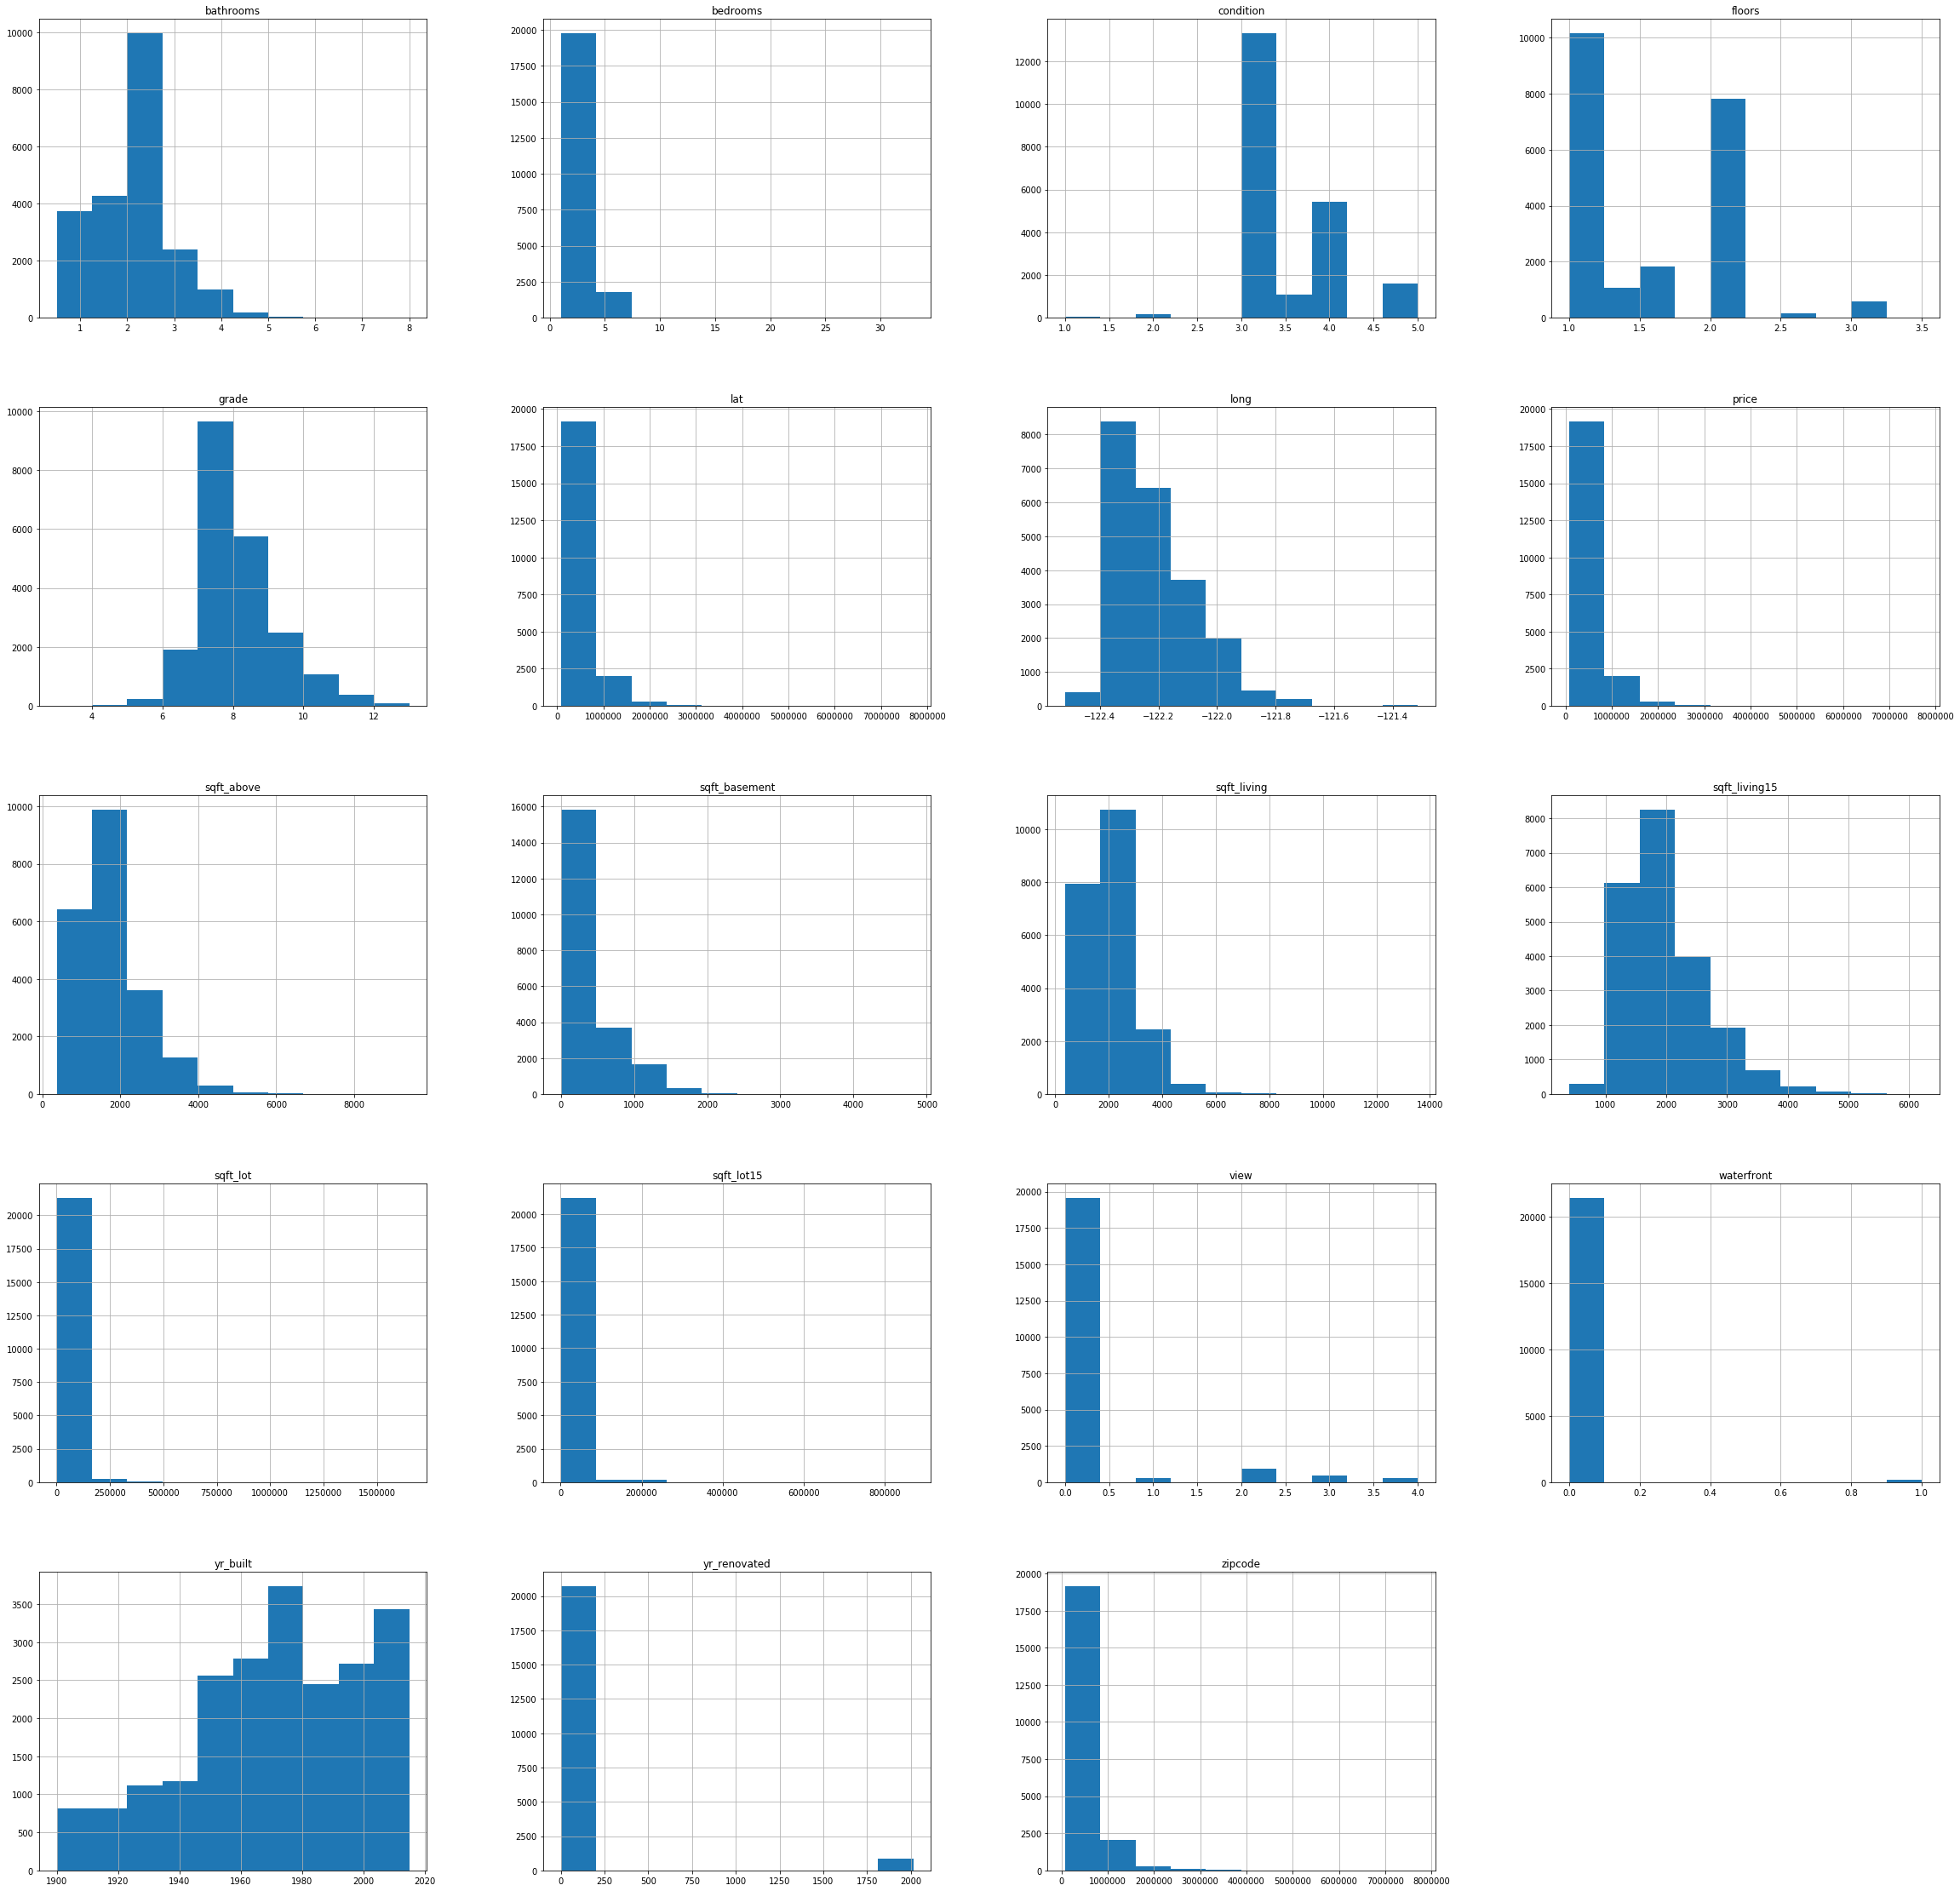

In [14]:
pd.DataFrame.hist(data, figsize = [40,40]);

# Scaling and Splitting the Data

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
y = data['price']
X = data.drop(['price', 'lat','long', 'sqft_living15', 'sqft_lot15', 'zipcode'], axis = 1)

In [18]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


# K Neighbors Regressor

Text(0, 0.5, 'MSE')

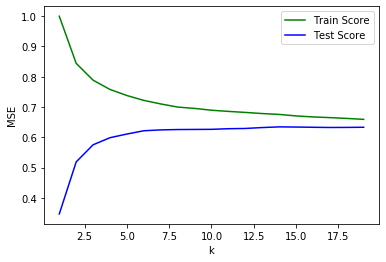

In [19]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

k=7 is the best choice

In [20]:
knn = KNeighborsRegressor(7)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [21]:
print("Train score :", knn.score(X_train, y_train))
print("Test score :", knn.score(X_test, y_test))

Train score : 0.7099131413558875
Test score : 0.6242015858557605


In [22]:
y_pred= knn.predict(X_test)

print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 135118.6940199075
Mean Squared Error is : 42442055640.4995
R-sqaure score is:  0.6242015858557605


# Linear regression using the Normal Equation

In [23]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Train score :",lreg.score(X_train, y_train))
print("Test score :",lreg.score(X_test, y_test))

Train score : 0.603757575911954
Test score : 0.6209289093076443


In [24]:
y_pred = lreg.predict(X_test)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 140615.17304556616
Mean Squared Error is : 42811666354.43719
R-sqaure score is:  0.6209289093076443


# SGD Regressor

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print("Train Score is: ", sgd_reg.score(X_train, y_train))
print("Test Score is: ",sgd_reg.score(X_test, y_test))

Train Score is:  0.5648566630486863
Test Score is:  0.5850358453513358


In [26]:
sgd_reg.coef_

array([-15259.68761055,  39124.36180457,  89633.59166374, -10786.8929003 ,
        -7042.7793857 ,  77522.05819395,  36917.88927606,   1219.18896927,
       103695.81705352,  20423.39019314,  25859.22442448, -74445.9783741 ,
        40936.42452144])

In [27]:
sgd_reg.intercept_

array([526278.68722324])

In [28]:
sgd_reg.n_iter_

64

In [29]:
y_pred = sgd_reg.predict(X_test)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 141819.53259034586
Mean Squared Error is : 46865370042.917755
R-sqaure score is:  0.5850358453513358


# Polynomial regression

In [30]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [31]:
print(train_score_list)
print(test_score_list)

[0.603757575911954, 0.6965828112286102]
[0.6209289093076444, 0.6613866219049456]


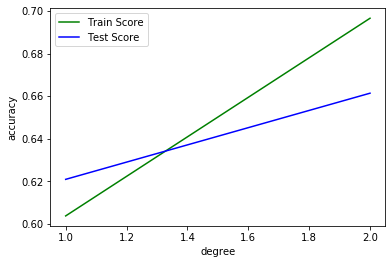

In [32]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

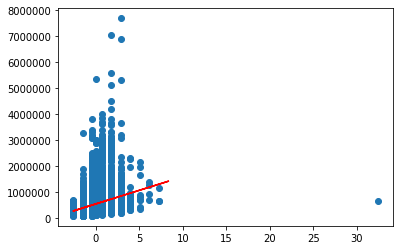

In [33]:
poly = PolynomialFeatures(1)
X_train_1 = X_train[:,0].reshape(-1,1)
X_test_1 = X_test[:,0].reshape(-1,1)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(X_test_1)
y_predict = lreg.predict(x_poly)

plt.scatter(X_train_1,y_train)
plt.plot(X_test_1, y_predict, c='r')

# Ridge

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [35]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

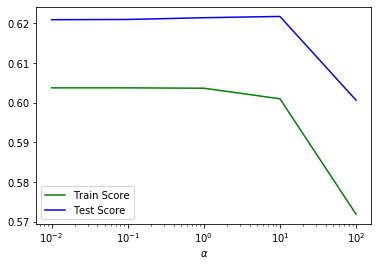

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [37]:
print(train_score_list)
print(test_score_list)

[0.6037575640273771, 0.6037564138819527, 0.6036631907648455, 0.6010024455726357, 0.5719245972869522]
[0.6209355881771671, 0.6209939949229439, 0.6214394605084115, 0.6217582616413899, 0.6006495848650166]


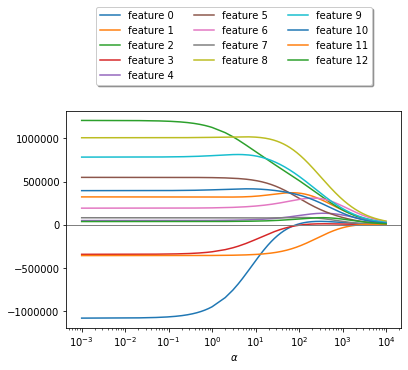

In [38]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

This suggests that the best $\alpha$ parameter is 10

In [39]:
ridge = Ridge(alpha = 10)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.6010
Test score: 0.6218


In [40]:
ridge.coef_

array([-414065.2327669 ,  331112.07541971,  845803.80398519,
       -169062.96827056,   61309.30188715,  512558.36817423,
        217617.08850658,   79920.54944656, 1013882.48457891,
        796636.38767994,  415010.01607495, -341495.33119168,
         43632.65606895])

In [41]:
ridge.intercept_

-41260.45041279122

In [42]:
y_pred = ridge.predict(X_test)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 139678.68332919566
Mean Squared Error is : 42718000664.084114
R-sqaure score is:  0.6217582616413899


# LASSO

In [43]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

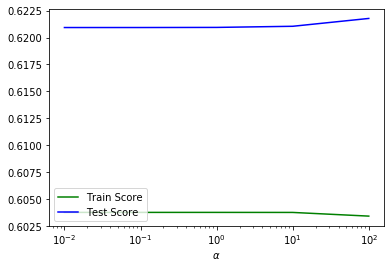

In [44]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

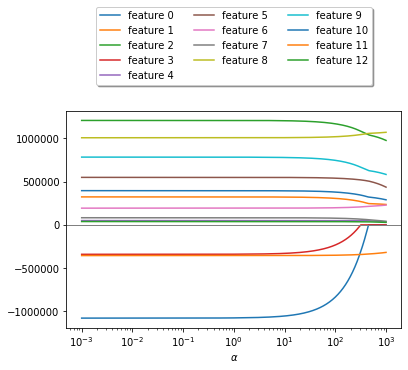

In [45]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

This suggests that the best $\alpha$ parameter is 100

In [46]:
lasso = Lasso(alpha = 100)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.6034
Test score: 0.6218


In [47]:
y_pred= lasso.predict(X_test)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 140382.98055789017
Mean Squared Error is : 42716255330.04566
R-sqaure score is:  0.6217737155055797


# Linear SVM

In [48]:
from sklearn.svm import LinearSVR

l_svr = LinearSVR(random_state=0)

l_svr.fit(X_train,y_train)

print("Train score :",l_svr.score(X_train, y_train))
print("Test score :",l_svr.score(X_test, y_test))

Train score : -1.9329614900438878
Test score : -2.2239273174478003


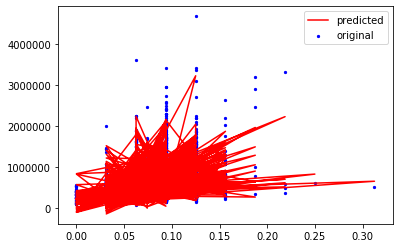

In [49]:
import matplotlib.pyplot as plt 
X_test1 = X_test[:, 0:1]
plt.scatter(X_test1, y_test, s=5, color="blue", label="original")
plt.plot(X_test1, y_pred, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show() 

In [50]:
y_pred = l_svr.predict(X_test)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 502059.7046016682
Mean Squared Error is : 364105055897.14246
R-sqaure score is:  -2.2239273174478003


# SVM with Kernal

In [51]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')

svr.fit(X_train,y_train)

print("Train score :",svr.score(X_train, y_train))
print("Test score :",svr.score(X_test, y_test))

c:\users\shash\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score : -0.040591342443026646
Test score : -0.03863153798215868


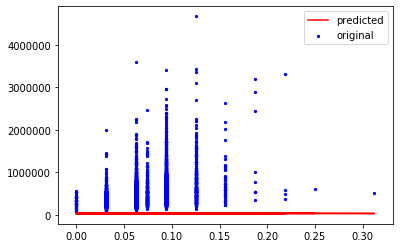

In [52]:
import matplotlib.pyplot as plt 
X_test1 = X_test[:, 0:1]
plt.scatter(X_test1, y_test, s=5, color="blue", label="original")
plt.plot(X_test1, y_pred, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show() 

In [53]:
y_pred = svr.predict(X_test)
print("Mean Absoulte Error is :",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is :",mean_squared_error(y_test, y_pred))
print("R-sqaure score is: ",r2_score(y_test, y_pred))

Mean Absoulte Error is : 211622.2001691919
Mean Squared Error is : 117301339936.19476
R-sqaure score is:  -0.03863153798215868


We observe that SVM models are not a good fit for the data.

# Best Performing Model - # K Neighbors Regressor
## k= 7
- Train score            : 0.7099131413558875
- Test score             : 0.6242015858557605
- Mean Absoulte Error is : 135118.6940199075
- Mean Squared Error is  : 42442055640.4995
- R-sqaure score is      :  0.6242015858557605

      

# PROJECT BY - Group 7
## Akhilandeshwari Bekkary (axb176530)
## Anantha Shashidhar Karunakaram(axk176830)